In [1]:
import numpy as np
import pandas as pd
import math
import librosa
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from IPython.display import Image

In [46]:
df1 = pd.read_csv('echonest.csv')
df2 = pd.read_csv('features.csv')
df3 = pd.read_csv('tracks.csv')

# 2.1

I look up information in datasets

In [3]:
df1

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,...,temporal_features_214,temporal_features_215,temporal_features_216,temporal_features_217,temporal_features_218,temporal_features_219,temporal_features_220,temporal_features_221,temporal_features_222,temporal_features_223
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.676960,3.61288,13.316690,262.929749
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.082770,6.01864,16.673548,325.581085
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.926490,5.86635,16.013849,356.755737
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.414010,8.33319,21.317064,483.403809
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.267070,11.20267,26.454180,751.147705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461,NaN,...,-1.721207,4.686078,0.213789,0.208800,0.007911,0.06395,2.040730,1.97678,8.144532,147.040405
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845,NaN,...,-0.647897,1.282306,0.214586,0.181860,0.011247,0.06240,0.922360,0.85996,1.794739,6.321268
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667,NaN,...,-0.771613,1.623510,0.180471,0.128185,0.010103,0.06222,2.251160,2.18894,5.578341,89.180328
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274,NaN,...,-2.054143,7.927149,0.250178,0.219205,0.014851,0.06390,1.487440,1.42354,2.173092,12.503966


In [4]:
df2

,track_id,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,-0.490129,0.463834,2.321970,-0.084352,1.662914,2.115189,-0.237794,5.695442,0.830353,...,0.128410,0.022547,0.019816,4.448255,0.172852,0.028773,0.028320,0.003906,0.955388,0.012385
106570,155317,-0.461559,-0.229601,-0.496632,-0.422033,0.130612,-0.263825,-0.628103,-0.082687,-0.229483,...,0.132964,0.023548,0.026527,3.270612,0.196289,0.031116,0.027832,0.002441,1.283060,0.019059
106571,155318,0.552473,-0.110498,-0.532014,0.263131,-0.224011,-0.530972,1.713526,1.418444,1.325197,...,0.108324,0.017540,0.020471,2.356727,0.212891,0.038450,0.037109,0.003418,0.828569,0.017904
106572,155319,-0.176901,0.187208,-0.050664,0.368843,0.066005,-0.857354,-0.780860,0.626281,-0.630938,...,0.088311,0.018328,0.017936,6.188604,0.167480,0.041480,0.038086,0.004883,1.818740,0.020133


In [5]:
df3

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106569,155316,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106570,155317,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106571,155318,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106572,155319,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


Merge df1 df2 df3 by key_id:track_id 

In [47]:
df = pd.merge(df2, df1, on="track_id", how="right")

In [48]:
df= pd.merge(df3, df, on="track_id", how="right")

Get dataset which content~13k rows

In [66]:
df

track_id  album_comments   album_date_created  album_favorites  \
0             2               0  2008-11-26 01:44:45                4   
1             3               0  2008-11-26 01:44:45                4   
2             5               0  2008-11-26 01:44:45                4   
3            10               0  2008-11-26 01:45:08                4   
4           134               0  2008-11-26 01:44:45                4   
...         ...             ...                  ...              ...   
13124    124857               0  2015-09-09 14:39:58                0   
13125    124862               0  2015-09-09 14:39:58                0   
13126    124863               0  2015-09-09 14:39:58                0   
13127    124864               0  2015-09-09 14:39:58                0   
13128    124911               0  2015-09-11 12:08:44                0   

       album_id  album_listens album_tags           album_title  album_tracks  \
0             1           6073         []  AWOL - A Way Of Life             7   
1             1           6073         []  AWOL - A Way Of Life             7   
2             1           6073         []  AWOL - A Way Of Life             7   
3             6          47632         []     Constant Hitmaker             2   
4             1           6073         []  AWOL - A Way Of Life             7   
...         ...            ...        ...                   ...           ...   
13124     18862          55904         []  Do You Know The Word            14   
13125     18862          55904         []  Do You Know The Word            14   
13126     18862          55904         []  Do You Know The Word            14   
13127     18862          55904         []  Do You Know The Word            14   
13128     18873           6108         []   Suicide Beauty Girl             1   

      album_type  artist_comments  artist_date_created  artist_favorites  \
0          Album                0  2008-11-26 01:42:32                 9   
1          Album                0  2008-11-26 01:42:32                 9   
2          Album                0  2008-11-26 01:42:32                 9   
3          Album                3  2008-11-26 01:42:55                74   
4          Album                0  2008-11-26 01:42:32                 9   
...          ...              ...                  ...               ...   
13124      Album                0  2015-09-09 14:02:39                 8   
13125      Album                0  2015-09-09 14:02:39                 8   
13126      Album                0  2015-09-09 14:02:39                 8   
13127      Album                0  2015-09-09 14:02:39                 8   
13128      Album                3  2012-05-17 12:46:11                81   

       artist_id      artist_name  \
0              1             AWOL   
1              1             AWOL   
2              1             AWOL   
3              6        Kurt Vile   
4              1             AWOL   
...          ...              ...   
13124      20818            BASIC   
13125      20818            BASIC   
13126      20818            BASIC   
13127      20818            BASIC   
13128      13530  Yusuke Tsutsumi   

                                             artist_tags set_split set_subset  \
0                                               ['awol']  training      small   
1                                               ['awol']  training     medium   
2                                               ['awol']  training      small   
3                                ['philly', 'kurt vile']  training      small   
4                                               ['awol']  training     medium   
...                                                  ...       ...        ...   
13124                                          ['basic']  training      large   
13125                                          ['basic']  training      large   
13126                                          ['basic']  training    

Use basic pandas tools to understand new df

In [9]:
df.tail()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,temporal_features_214,temporal_features_215,temporal_features_216,temporal_features_217,temporal_features_218,temporal_features_219,temporal_features_220,temporal_features_221,temporal_features_222,temporal_features_223
13124,124857,0,2015-09-09 14:39:58,2006-02-06 00:00:00,Daan Hendriks,0,18862,"<p>""Do you know a word that means both look at...",55904,Daan Hendriks,...,-1.721207,4.686078,0.213789,0.208800,0.007911,0.06395,2.040730,1.97678,8.144532,147.040405
13125,124862,0,2015-09-09 14:39:58,2006-02-06 00:00:00,Daan Hendriks,0,18862,"<p>""Do you know a word that means both look at...",55904,Daan Hendriks,...,-0.647897,1.282306,0.214586,0.181860,0.011247,0.06240,0.922360,0.85996,1.794739,6.321268
13126,124863,0,2015-09-09 14:39:58,2006-02-06 00:00:00,Daan Hendriks,0,18862,"<p>""Do you know a word that means both look at...",55904,Daan Hendriks,...,-0.771613,1.623510,0.180471,0.128185,0.010103,0.06222,2.251160,2.18894,5.578341,89.180328
13127,124864,0,2015-09-09 14:39:58,2006-02-06 00:00:00,Daan Hendriks,0,18862,"<p>""Do you know a word that means both look at...",55904,Daan Hendriks,...,-2.054143,7.927149,0.250178,0.219205,0.014851,0.06390,1.487440,1.42354,2.173092,12.503966
13128,124911,0,2015-09-11 12:08:44,2010-09-23 00:00:00,NaN,0,18873,NaN,6108,NaN,...,-0.215639,-0.584081,0.603893,0.505940,0.608585,0.06830,16.559731,16.49143,15.169022,302.946350


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 820 entries, track_id to temporal_features_223
dtypes: float64(764), int64(16), object(40)
memory usage: 82.2+ MB


In [11]:
df.describe()

,track_id,album_comments,album_favorites,album_id,album_listens,album_tracks,artist_comments,artist_favorites,artist_id,artist_latitude,...,temporal_features_214,temporal_features_215,temporal_features_216,temporal_features_217,temporal_features_218,temporal_features_219,temporal_features_220,temporal_features_221,temporal_features_222,temporal_features_223
count,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,8052.000000,...,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,34031.058268,0.348770,1.670805,6434.838982,21288.982710,12.406505,1.546119,19.630589,6303.865641,40.144635,...,-1.966002,10.745951,0.308984,0.255381,0.163876,0.068526,4.183428,4.114902,7.605432,138.932366
std,28950.422182,1.186648,3.073932,4513.861075,52361.334813,12.093782,4.958391,66.047980,4974.103114,15.603089,...,1.708499,20.053146,0.140164,0.083731,3.484144,0.010930,4.967481,4.967004,6.444884,225.584951
min,2.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-43.532054,...,-17.966162,-1.867880,0.129023,0.098280,0.000518,0.060000,0.322180,0.224580,-3.566834,-1.687834
25%,12986.000000,0.000000,0.000000,3036.000000,2918.000000,6.000000,0.000000,2.000000,2203.000000,37.871166,...,-2.587326,1.229409,0.242371,0.208750,0.021321,0.063080,1.817050,1.749660,2.866906,15.565598
50%,28097.000000,0.000000,1.000000,5972.000000,6653.000000,10.000000,0.000000,6.000000,5442.000000,40.714550,...,-1.565120,4.355214,0.286014,0.242745,0.042146,0.064490,3.094060,3.026260,5.502340,55.874954
75%,45021.000000,0.000000,2.000000,8697.000000,17382.000000,15.000000,1.000000,15.000000,9288.000000,47.218371,...,-0.875471,11.407599,0.339086,0.285305,0.087516,0.070070,5.147530,5.079770,10.597994,175.938553
max,124911.000000,17.000000,40.000000,18873.000000,808021.000000,164.000000,68.000000,963.000000,20818.000000,65.201935,...,1.663782,423.621094,5.211423,1.680570,375.744781,0.342000,226.326767,226.244080,67.041878,4790.696777


Change df to csv and xlsx, to see every column info

In [45]:
df.to_csv('df.csv', index=False)

In [13]:
df.to_excel('df.xlsx')

In [67]:
#pd.set_option('display.max_columns', None)
#df

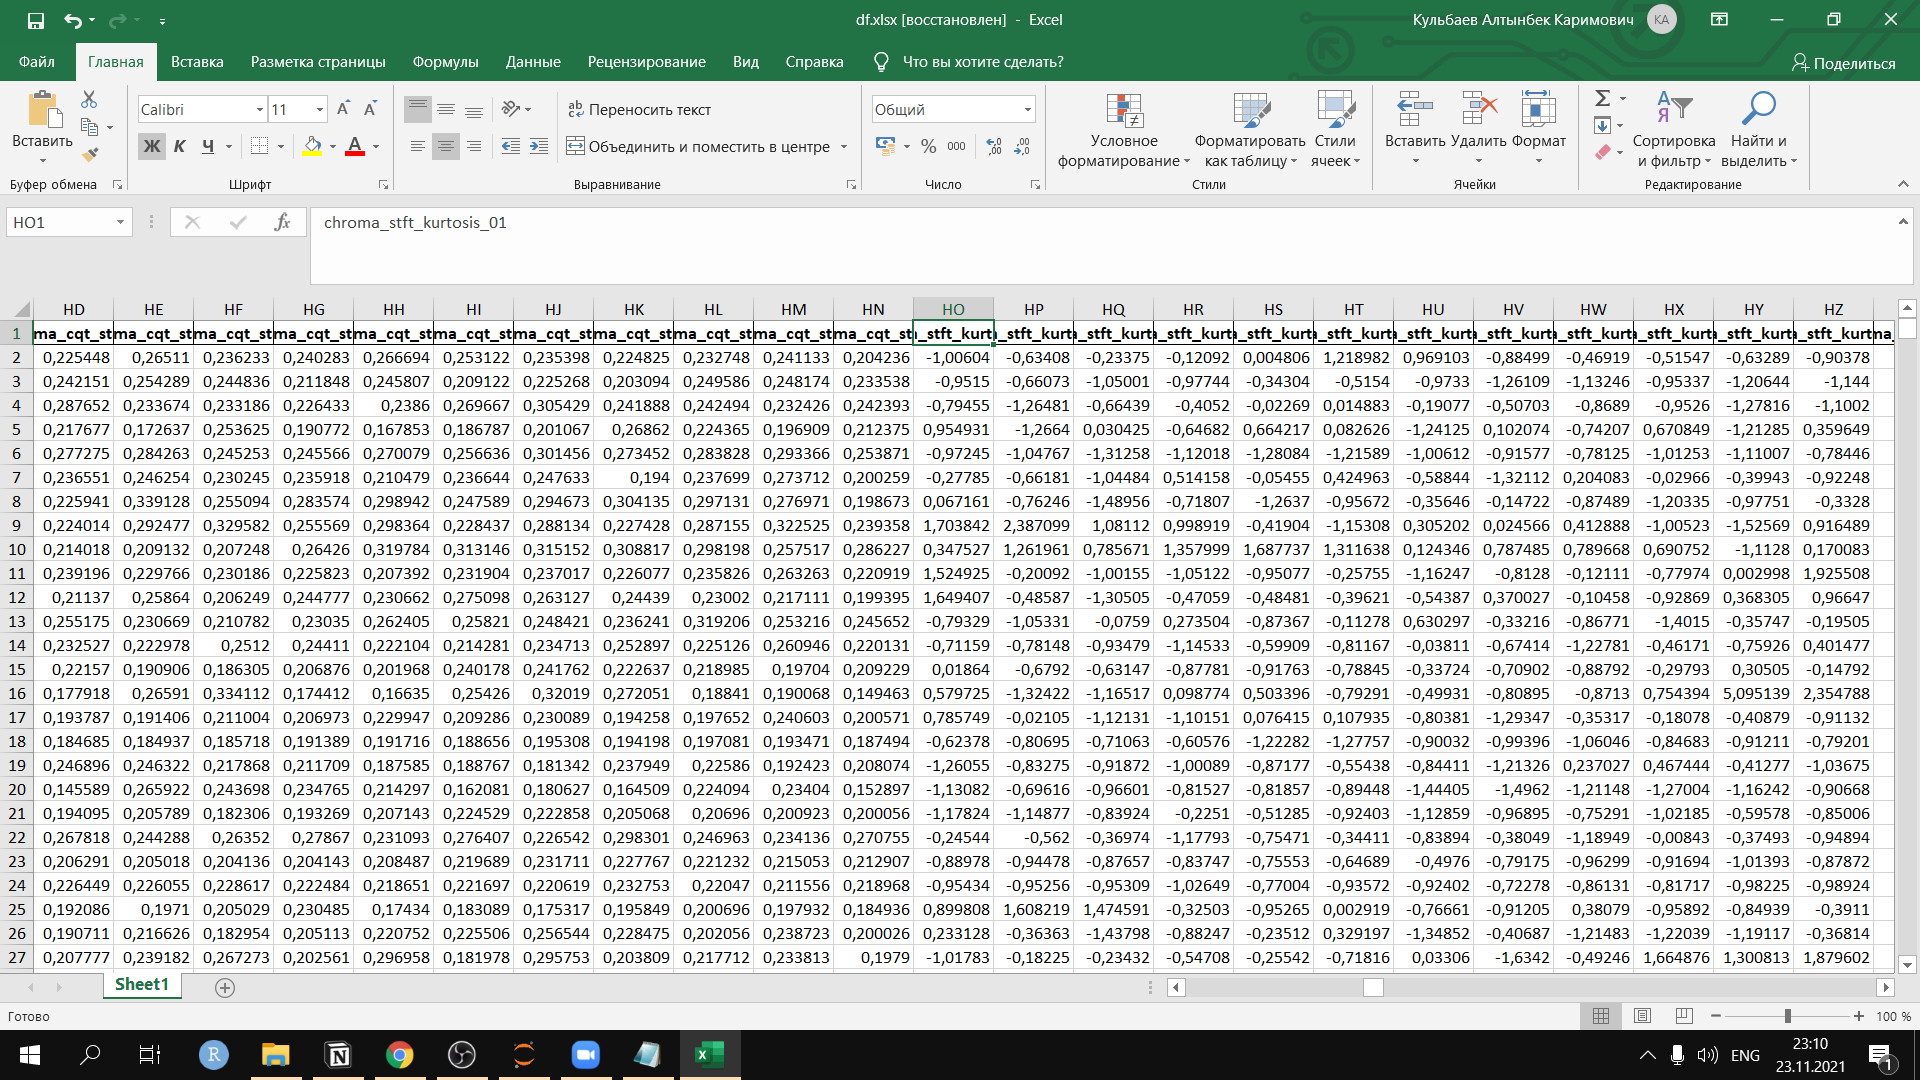

In [14]:
from IPython.display import Image
Image('df_xlsx.png')

In [50]:
df = pd.read_csv('df.csv')

In [53]:
len(df)

13129

Check columns for duplicates

In [55]:
df = df.loc[:,~df.columns.duplicated()]

In [56]:
df

,track_id,album_comments,album_date_created,album_favorites,album_id,album_listens,album_tags,album_title,album_tracks,album_type,...,temporal_features_214,temporal_features_215,temporal_features_216,temporal_features_217,temporal_features_218,temporal_features_219,temporal_features_220,temporal_features_221,temporal_features_222,temporal_features_223
0,2,0,2008-11-26 01:44:45,4,1,6073,[],AWOL - A Way Of Life,7,Album,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.676960,3.61288,13.316690,262.929749
1,3,0,2008-11-26 01:44:45,4,1,6073,[],AWOL - A Way Of Life,7,Album,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.082770,6.01864,16.673548,325.581085
2,5,0,2008-11-26 01:44:45,4,1,6073,[],AWOL - A Way Of Life,7,Album,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.926490,5.86635,16.013849,356.755737
3,10,0,2008-11-26 01:45:08,4,6,47632,[],Constant Hitmaker,2,Album,...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.414010,8.33319,21.317064,483.403809
4,134,0,2008-11-26 01:44:45,4,1,6073,[],AWOL - A Way Of Life,7,Album,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.267070,11.20267,26.454180,751.147705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,124857,0,2015-09-09 14:39:58,0,18862,55904,[],Do You Know The Word,14,Album,...,-1.721207,4.686078,0.213789,0.208800,0.007911,0.06395,2.040730,1.97678,8.144532,147.040405
13125,124862,0,2015-09-09 14:39:58,0,18862,55904,[],Do You Know The Word,14,Album,...,-0.647897,1.282306,0.214586,0.181860,0.011247,0.06240,0.922360,0.85996,1.794739,6.321268
13126,124863,0,2015-09-09 14:39:58,0,18862,55904,[],Do You Know The Word,14,Album,...,-0.771613,1.623510,0.180471,0.128185,0.010103,0.06222,2.251160,2.18894,5.578341,89.180328
13127,124864,0,2015-09-09 14:39:58,0,18862,55904,[],Do You Know The Word,14,Album,...,-2.054143,7.927149,0.250178,0.219205,0.014851,0.06390,1.487440,1.42354,2.173092,12.503966


Check columns for isnull()

In [104]:
df.isnull().sum()

track_id                   0
album_comments             0
album_date_created       191
album_favorites            0
album_id                   0
                        ... 
temporal_features_219      0
temporal_features_220      0
temporal_features_221      0
temporal_features_222      0
temporal_features_223      0
Length: 788, dtype: int64

In [78]:
len(df.columns)

788

In [86]:
for name, values in df.iteritems():
    print('{name}: {value}'.format(name=name, value=values[0]))

track_id: 2
album_comments: 0
album_date_created: 2008-11-26 01:44:45
album_favorites: 4
album_id: 1
album_listens: 6073
album_tags: []
album_title: AWOL - A Way Of Life
album_tracks: 7
album_type: Album
artist_comments: 0
artist_date_created: 2008-11-26 01:42:32
artist_favorites: 9
artist_id: 1
artist_name: AWOL
artist_tags: ['awol']
set_split: training
set_subset: small
track_bit_rate: 256000
track_comments: 0
track_date_created: 2008-11-26 01:48:12
track_duration: 168
track_favorites: 2
track_genres: [21]
track_genres_all: [21]
track_interest: 4656
track_license: Attribution-NonCommercial-ShareAlike 3.0 International
track_listens: 1293
track_number: 3
track_tags: []
track_title: Food
chroma_cens_kurtosis_01: 7.1806526184
chroma_cens_kurtosis_02: 5.2303090096
chroma_cens_kurtosis_03: 0.2493208050699999
chroma_cens_kurtosis_04: 1.3476201296
chroma_cens_kurtosis_05: 1.4824777842
chroma_cens_kurtosis_06: 0.53137123585
chroma_cens_kurtosis_07: 1.4815930128
chroma_cens_kurtosis_08: 2.691

In [87]:
for ind, column in enumerate(df.columns):
    print(ind, column)

0 track_id
1 album_comments
2 album_date_created
3 album_favorites
4 album_id
5 album_listens
6 album_tags
7 album_title
8 album_tracks
9 album_type
10 artist_comments
11 artist_date_created
12 artist_favorites
13 artist_id
14 artist_name
15 artist_tags
16 set_split
17 set_subset
18 track_bit_rate
19 track_comments
20 track_date_created
21 track_duration
22 track_favorites
23 track_genres
24 track_genres_all
25 track_interest
26 track_license
27 track_listens
28 track_number
29 track_tags
30 track_title
31 chroma_cens_kurtosis_01
32 chroma_cens_kurtosis_02
33 chroma_cens_kurtosis_03
34 chroma_cens_kurtosis_04
35 chroma_cens_kurtosis_05
36 chroma_cens_kurtosis_06
37 chroma_cens_kurtosis_07
38 chroma_cens_kurtosis_08
39 chroma_cens_kurtosis_09
40 chroma_cens_kurtosis_10
41 chroma_cens_kurtosis_11
42 chroma_cens_kurtosis_12
43 chroma_cens_max_01
44 chroma_cens_max_02
45 chroma_cens_max_03
46 chroma_cens_max_04
47 chroma_cens_max_05
48 chroma_cens_max_06
49 chroma_cens_max_07
50 chroma_cen

I analyze all my colums with instruments below and conclude that 0-30,549-563 columns content necessary unique info. 31-548
and 564-788 columns we reduce dimension with PCA method

In [ ]:
#track_id 0 
#track_title 30
chroma_cens_kurtosis_01 31
zcr_std_01 548
#audio_features_acousticness 549
#social_features_song_hotttnesss 563
temporal_features_000 564

In [99]:
df_need_1= df.iloc[:,0:31]

In [ ]:
#df_need_1

In [100]:
df_need_2= df.iloc[:,549:564]

In [ ]:
#df_need_2

In [101]:
df_pca_1=df.iloc[:,31:549]

In [102]:
#df_pca_1

In [103]:
df_pca_2=df.iloc[:,564:788]

In [ ]:
#df_pca_2

In [110]:
df_need = pd.concat([df_need_1, df_need_2],axis=1)

In [112]:
#df_need

In [113]:
df_pca = pd.concat([df_pca_1, df_pca_2],axis=1)

In [116]:
df_pca.isnull().sum()

chroma_cens_kurtosis_01    0
chroma_cens_kurtosis_02    0
chroma_cens_kurtosis_03    0
chroma_cens_kurtosis_04    0
chroma_cens_kurtosis_05    0
                          ..
temporal_features_219      0
temporal_features_220      0
temporal_features_221      0
temporal_features_222      0
temporal_features_223      0
Length: 742, dtype: int64

In [120]:
null_column_count=0
null_list=df_pca.isnull().sum()
for i in range(len(null_list)):
       if(null_list[i]!=0):
            null_column_count+=1
print("null_column_count:",null_column_count)

null_column_count: 0


Wow its mean that dataframe for PCA dont have null elements

In [121]:
null_column_count=0
null_list=df_need.isnull().sum()
for i in range(len(null_list)):
       if(null_list[i]!=0):
            null_column_count+=1
print("null_column_count:",null_column_count)

null_column_count: 5


# 2.2

In [129]:
from sklearn.decomposition import PCA
pca = PCA(.70)
pca_fit = pca.fit_transform(df_pca)
pca_x=pca.transform(df_pca)

In [130]:
pca_fit 

array([[ -816.77733395,  1176.64378602,  -504.1385501 ],
       [-1425.82964066,  1711.01175148,   -82.84542355],
       [ -989.43014455,   533.27521641,  -304.78708769],
       ...,
       [ -571.03295525,  1143.52731282,  -219.44360366],
       [ -386.1123049 ,   754.62639128,   785.88907844],
       [  704.75985907, -3486.91164263,  -160.40663465]])

In [131]:
pca_x

array([[ -816.77733395,  1176.64378602,  -504.1385501 ],
       [-1425.82964066,  1711.01175148,   -82.84542355],
       [ -989.43014455,   533.27521641,  -304.78708769],
       ...,
       [ -571.03295525,  1143.52731282,  -219.44360366],
       [ -386.1123049 ,   754.62639128,   785.88907844],
       [  704.75985907, -3486.91164263,  -160.40663465]])

In [132]:
pca.explained_variance_ratio_

array([0.43038008, 0.20542643, 0.10803578])

In [133]:
sum(pca.explained_variance_ratio_)

0.7438422889334886